In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import json

In [2]:
pd.set_option("display.max_columns",500)

In [3]:
# pip install openpyxl

In [4]:
# pip install category_encoders

In [5]:
# data=pd.read_excel("House_Rent_Train.xlsx")
# data.to_csv("House_Rent_Train.csv",index=False)
# data=pd.read_excel("House_Rent_Test.xlsx")
# data.to_csv("House_Rent_Test.csv",index=False)

In [6]:
data=pd.read_excel("House_Rent_Train.xlsx")
data

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,BOTH,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(20555, 25)

In [8]:
data.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [9]:
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [11]:
data.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [12]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)


,percent_missing
locality,0.778399
type,0.131355
rent,0.111895
water_supply,0.111895
bathroom,0.111895
property_age,0.111895
floor,0.111895
total_floor,0.111895
amenities,0.111895
building_type,0.111895


In [13]:
data.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

In [14]:
# data["locality"].fillna(data["locality"].mode()[0],inplace=True)

In [15]:
data.dropna(inplace=True)

In [16]:
print("total_columns ----->>>>>", data.shape[1])
print("total_rows----->>>>>", data.shape[0])

total_columns ----->>>>> 25
total_rows----->>>>> 20377


In [17]:
data.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [18]:
data.shape

(20377, 25)

In [19]:
data.type.value_counts()

type
BHK2        11591
BHK3         4356
BHK1         3586
RK1           550
BHK4          232
BHK4PLUS       30
bhk2           16
bhk3           12
1BHK1           4
Name: count, dtype: int64

In [20]:
data["type"].replace({'BHK2':'2BHK','BHK3':'3BHK','BHK1':'1BHK','BHK4':'4BHK','bhk2':'2BHK','bhk3':'3BHK','1BHK1':'1BHK','BHK4PLUS':'4PLUSBHK','RK1':'1RK'},inplace=True)

In [21]:
data.locality.value_counts()

locality
Whitefield                                                                                        900
HSR Layout                                                                                        682
Banashankari                                                                                      644
Marathahalli                                                                                      473
Bellandur                                                                                         433
                                                                                                 ... 
Simhadri layout                                                                                     1
Skylark Esta, Seetharampalya, Bengaluru, Karnataka, India                                           1
23d, 2nd A Cross Rd, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560050, India,Bengaluru      1
Wilson Garden,                                                           

In [22]:
data.activation_date

1        2017-09-10 12:48:00
2        2018-12-06 22:02:00
3           20-07-2018 16:22
4           31-05-2018 17:41
5           24-10-2017 18:29
                ...         
20524    2017-11-10 17:08:00
20528       19-10-2017 20:31
20529       21-12-2017 21:18
20530       28-06-2018 21:58
20531    2018-08-07 22:31:00
Name: activation_date, Length: 20377, dtype: object

In [23]:
data["activation_date"] = pd.to_datetime(data["activation_date"])

In [24]:
data["activation_date"]


1       2017-09-10 12:48:00
2       2018-12-06 22:02:00
3       2018-07-20 16:22:00
4       2018-05-31 17:41:00
5       2017-10-24 18:29:00
                ...        
20524   2017-11-10 17:08:00
20528   2017-10-19 20:31:00
20529   2017-12-21 21:18:00
20530   2018-06-28 21:58:00
20531   2018-08-07 22:31:00
Name: activation_date, Length: 20377, dtype: datetime64[ns]

In [25]:
data['activation_date'] = pd.to_datetime(data['activation_date'])

# Extracting month and day
data['activation_month'] = data['activation_date'].dt.month
data['activation_day'] = data['activation_date'].dt.day

# Display the updated DataFrame
print(data[['activation_date', 'activation_month', 'activation_day']])


          activation_date  activation_month  activation_day
1     2017-09-10 12:48:00                 9              10
2     2018-12-06 22:02:00                12               6
3     2018-07-20 16:22:00                 7              20
4     2018-05-31 17:41:00                 5              31
5     2017-10-24 18:29:00                10              24
...                   ...               ...             ...
20524 2017-11-10 17:08:00                11              10
20528 2017-10-19 20:31:00                10              19
20529 2017-12-21 21:18:00                12              21
20530 2018-06-28 21:58:00                 6              28
20531 2018-08-07 22:31:00                 8               7

[20377 rows x 3 columns]


In [26]:
data.lease_type.value_counts()

lease_type
FAMILY      10113
ANYONE       9622
BACHELOR      584
COMPANY        58
Name: count, dtype: int64

In [27]:
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent',
       'activation_month', 'activation_day'],
      dtype='object')

In [28]:
data.gym.value_counts()

gym
0    15767
1     4610
Name: count, dtype: int64

In [29]:
data.lift.value_counts()

lift
0    13018
1     7359
Name: count, dtype: int64

In [30]:
data.swimming_pool.value_counts()

swimming_pool
0    16822
1     3555
Name: count, dtype: int64

In [31]:
data.negotiable.value_counts()

negotiable
1    14498
0     5879
Name: count, dtype: int64

In [32]:
data.furnishing.value_counts()

furnishing
SEMI_FURNISHED     17787
NOT_FURNISHED       1424
FULLY_FURNISHED     1166
Name: count, dtype: int64

In [33]:
data.parking.value_counts()

parking
BOTH            10729
TWO_WHEELER      7177
FOUR_WHEELER     1436
NONE             1035
Name: count, dtype: int64

In [34]:
data.property_age=data.property_age.astype(int)

In [35]:
data.property_age.value_counts()

property_age
 0      3312
 10     2853
 5      2737
 1      2104
 3      1884
 2      1318
 4       977
 8       948
 7       819
 15      772
 6       771
 20      413
 12      341
 9       325
 25      127
 13      101
 30      100
 11       99
 14       82
 18       59
 16       42
 17       42
-1        33
 40       17
 22       14
 50       12
 19       11
 21       11
 35        9
 23        8
 27        6
 34        5
 45        4
 24        4
 28        3
 26        3
 33        3
 100       2
 37        1
 42        1
 60        1
 80        1
 49        1
 400       1
Name: count, dtype: int64

In [36]:

# Define the age categories
bins = [-1, 0, 5, 10, 15, 20, 25, 30, 40, 50, 100, float('inf')]
labels = ['Unknown', 'New', '5-10 years', '10-15 years', '15-20 years', '20-25 years',
          '25-30 years', '30-40 years', '40-50 years', '50-100 years', 'Very Old']

# Create a new column 'age_category'
data['prop_age_category'] = pd.cut(data['property_age'], bins=bins, labels=labels, right=False)

# Display the counts in each age category
print(data['prop_age_category'].value_counts())

prop_age_category
New             9595
5-10 years      5600
10-15 years     3476
15-20 years      926
20-25 years      450
25-30 years      139
30-40 years      118
Unknown           33
40-50 years       23
50-100 years      14
Very Old           3
Name: count, dtype: int64


In [37]:
data.bathroom.value_counts()

bathroom
2.0     11214
1.0      6222
3.0      2618
4.0       285
5.0        33
6.0         3
21.0        1
7.0         1
Name: count, dtype: int64

In [38]:
data["bathroom"].replace({21.0:2.0},inplace=True)

In [39]:
data.bathroom.value_counts()

bathroom
2.0    11215
1.0     6222
3.0     2618
4.0      285
5.0       33
6.0        3
7.0        1
Name: count, dtype: int64

In [40]:
data["bathroom"]=data["bathroom"].astype(int)

In [41]:
data["bathroom"].dtypes

dtype('int32')

In [42]:
data.facing.value_counts()

facing
E     9457
N     5888
W     2610
S     1211
NE     810
SE     193
NW     149
SW      59
Name: count, dtype: int64

In [43]:
data.cup_board.value_counts()

cup_board
2.0        8525
3.0        3753
1.0        3721
0.0        1866
4.0        1309
5.0         443
6.0         421
8.0         114
7.0          77
10.0         75
9.0          36
12.0         17
15.0          6
11.0          5
20.0          4
16.0          2
13.0          1
40.0          1
48026.0       1
Name: count, dtype: int64

In [44]:
data.cup_board.replace({48026.0:48.0},inplace=True)

In [45]:
data.cup_board=data.cup_board.astype(int)

In [46]:
data.cup_board.dtypes

dtype('int32')

In [47]:
data.floor.value_counts()

floor
1.0     5854
0.0     4964
2.0     4502
3.0     2564
4.0     1179
5.0      292
6.0      204
7.0      187
9.0      130
8.0      119
10.0     100
11.0      86
12.0      57
14.0      44
13.0      31
15.0      23
16.0      16
17.0       9
19.0       6
18.0       5
20.0       3
25.0       1
22.0       1
Name: count, dtype: int64

In [48]:
data.floor=data.floor.astype(int)

In [49]:
data.total_floor.value_counts()

total_floor
2.0     4835
4.0     4780
3.0     4639
1.0     2099
5.0     1474
0.0      360
14.0     239
6.0      211
12.0     209
9.0      206
10.0     195
11.0     195
8.0      180
13.0     170
7.0      167
15.0     124
19.0      69
16.0      64
18.0      52
17.0      37
20.0      25
21.0      18
23.0       9
24.0       7
25.0       5
22.0       4
26.0       4
Name: count, dtype: int64

In [50]:
import json

# Assuming 'amenities' column contains JSON strings, convert them to dictionaries
data['amenities'] = data['amenities'].apply(lambda x: json.loads(x))

# Now, you can apply your function to count 'True' values in dictionaries
data['true_amenities_count'] = data['amenities'].apply(lambda x: list(x.values()).count(True))


In [51]:
data['true_amenities_count'].value_counts()

true_amenities_count
3     3487
1     3277
2     2268
4     2115
0     1189
5     1108
6      861
7      773
8      708
9      642
10     598
11     595
15     502
13     488
12     486
14     465
16     372
17     240
18     124
19      79
Name: count, dtype: int64

In [52]:
data.drop(columns=["amenities"],inplace=True)

In [53]:
data.total_floor=data.total_floor.astype(int)

In [54]:
data.total_floor.dtypes

dtype('int32')

In [55]:
data["water_supply"].value_counts()

water_supply
CORP_BORE      10617
CORPORATION     6695
BOREWELL        3065
Name: count, dtype: int64

In [56]:
data["building_type"].value_counts()

building_type
IF    9194
AP    8790
IH    2376
GC      17
Name: count, dtype: int64

In [57]:
data.balconies.value_counts()

balconies
1.0     7957
0.0     5868
2.0     4634
3.0     1582
4.0      288
5.0       40
6.0        4
10.0       3
13.0       1
Name: count, dtype: int64

In [58]:
data.balconies=data.balconies.astype(int)

In [59]:
data.balconies.dtypes

dtype('int32')

In [60]:
data["rent"]=data["rent"].astype(int)

In [61]:
data

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,activation_month,activation_day,prop_age_category,true_amenities_count
1,ff8081815ee25e15015ee50004da2acd,2BHK,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4,2,NE,2,3,4,CORPORATION,AP,2,22000,9,10,New,8
2,ff80818163f29c9e0163f46770b873e7,3BHK,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6,3,E,3,1,5,CORP_BORE,AP,3,28000,12,6,5-10 years,6
3,ff80818164b68a700164b74b1b247a1d,1BHK,Attiguppe,2018-07-20 16:22:00,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3,1,E,1,1,2,CORPORATION,IH,0,8000,7,20,New,0
4,ff80818163b1faf00163b4b9b8a163b1,3BHK,Kodihalli,2018-05-31 17:41:00,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15,3,E,4,0,0,CORPORATION,IH,1,45000,5,31,15-20 years,3
5,ff8081815f48e4aa015f4dd1a9c6696b,1BHK,"Seetharampalya,Hoodi",2017-10-24 18:29:00,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0,2,E,1,3,5,CORP_BORE,AP,2,18000,10,24,New,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,ff80818159ded60e0159dfff948e5bcb,1BHK,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30,2,E,1,1,4,CORP_BORE,AP,1,20000,11,10,30-40 years,9
20528,ff8081815e73c2e2015e74ac10e91975,2BHK,Koramangala 4th Block,2017-10-19 20:31:00,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10,2,N,2,1,2,CORPORATION,IH,2,30000,10,19,10-15 years,4
20529,ff8081816073f28c016077bb8db47e4f,2BHK,Kumaraswamy Layout,2017-12-21 21:18:00,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0,2,W,2,5,5,BOREWELL,AP,2,16000,12,21,New,8
20530,ff8081814c6f8c9b014c6febae49016f,2BHK,Indiranagar,2018-06-28 21:58:00,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5,2,E,2,2,4,CORP_BORE,AP,3,30000,6,28,5-10 years,10


In [62]:
data.drop(columns=["id","activation_date","activation_day","prop_age_category"],inplace=True)

In [63]:
data.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent,activation_month,true_amenities_count
count,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000
mean,12.945750,77.637238,0.226235,0.361142,0.174461,0.711488,1061.437209,5.777053,1.856799,2.212985,1.869510,3.798106,1.147863,19048.502969,6.325072,5.241154
std,0.029587,0.110758,0.418404,0.480344,0.379515,0.453081,591.857798,6.362450,0.698171,1.582902,2.181633,3.183849,0.993290,8433.444157,3.251640,4.611619
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000
25%,12.918232,77.571912,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000,4.000000,2.000000
50%,12.943792,77.633367,0.000000,0.000000,0.000000,1.000000,1044.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000,6.000000,3.000000
75%,12.970922,77.695692,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000,9.000000,8.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,7.000000,48.000000,25.000000,26.000000,13.000000,50000.000000,12.000000,19.000000


In [64]:
pd.DataFrame(data.dtypes.value_counts()).T

,object,int32,int64,float64
count,8,8,6,2


In [65]:
integer_data_cols = [var for var in data.columns if data[var].dtype == 'int']
integer_data_cols

['property_age',
 'bathroom',
 'cup_board',
 'floor',
 'total_floor',
 'balconies',
 'rent',
 'activation_month']

In [66]:
for i in integer_data_cols:
  print(f'Column "{i}" is divided into "{len(data[i].value_counts())}" categories.')
     

Column "property_age" is divided into "44" categories.
Column "bathroom" is divided into "7" categories.
Column "cup_board" is divided into "19" categories.
Column "floor" is divided into "23" categories.
Column "total_floor" is divided into "27" categories.
Column "balconies" is divided into "9" categories.
Column "rent" is divided into "206" categories.
Column "activation_month" is divided into "12" categories.


In [67]:
object_data_cols = [var for var in data.columns if data[var].dtype == 'object']
object_data_cols

['type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type']

In [68]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(data[i].value_counts())}" categories.')

Column "type" is divided into "6" categories.
Column "locality" is divided into "1917" categories.
Column "lease_type" is divided into "4" categories.
Column "furnishing" is divided into "3" categories.
Column "parking" is divided into "4" categories.
Column "facing" is divided into "8" categories.
Column "water_supply" is divided into "3" categories.
Column "building_type" is divided into "4" categories.


EDA

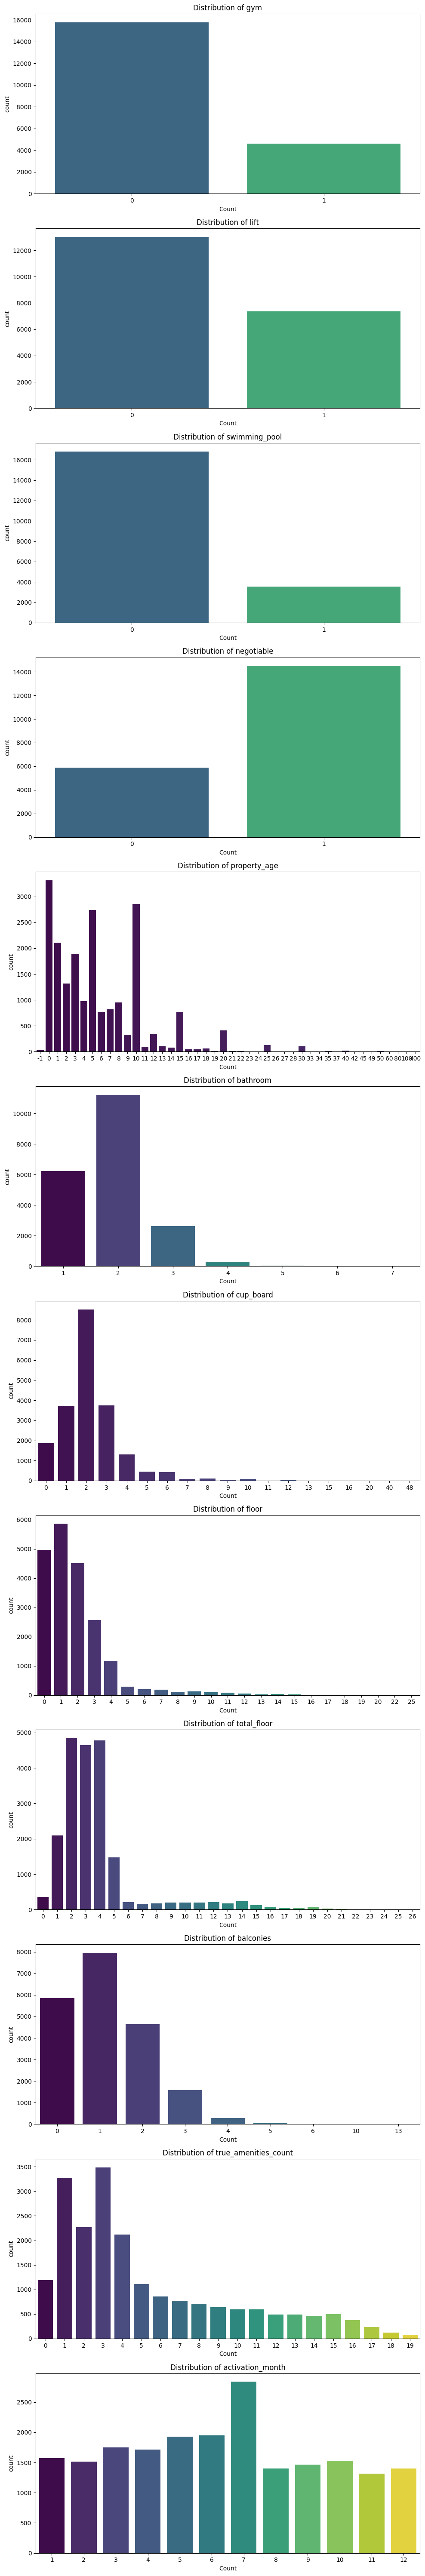

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# List of columns to plot
columns_to_plot = ['gym', 'lift', 'swimming_pool', 'negotiable', 'property_age', 'bathroom', 'cup_board',
                   'floor', 'total_floor', 'balconies', 'true_amenities_count', 'activation_month']

# Set up subplots

# Assuming you have a list of columns to plot stored in 'columns_to_plot'
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=data, ax=axes[i], hue=column, palette='viridis', legend=False)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Count')

plt.tight_layout()
plt.show()

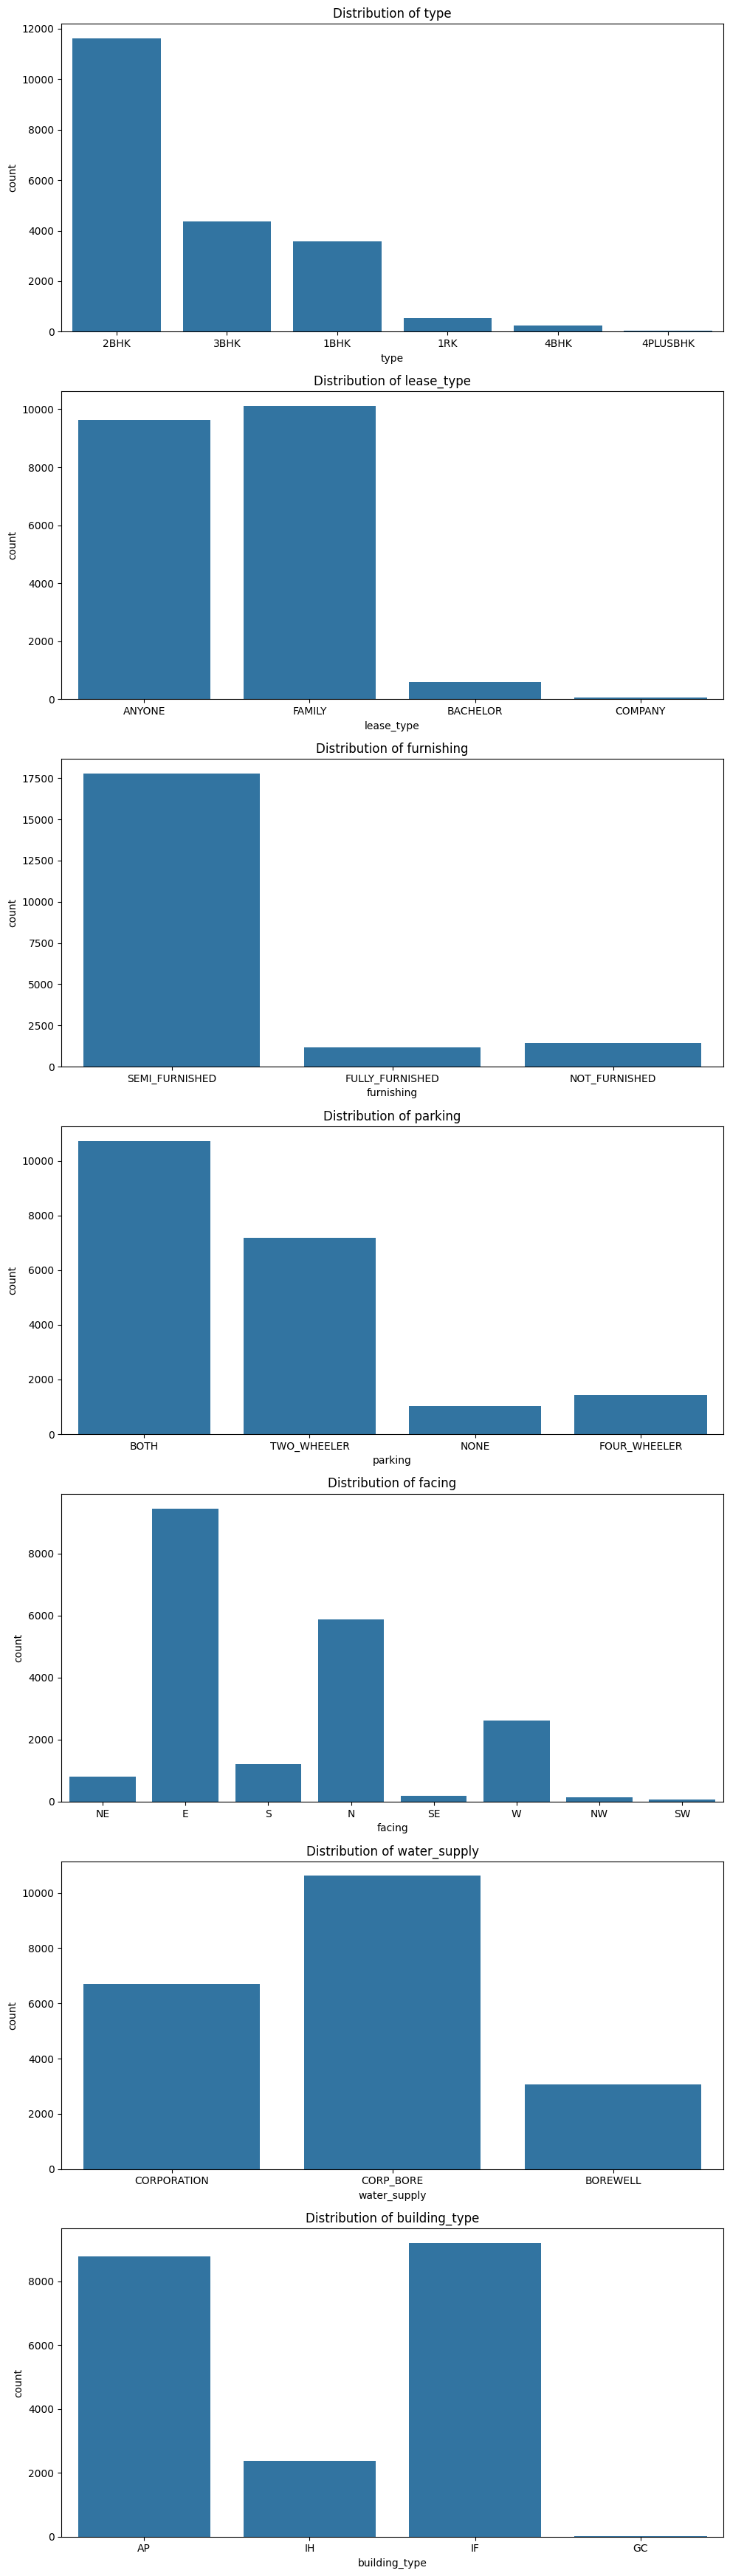

In [70]:
# List of columns to plot
columns_to_plot = ['type', 'lease_type', 'furnishing', 'parking', 'facing', 'water_supply', 'building_type']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Loop through columns and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


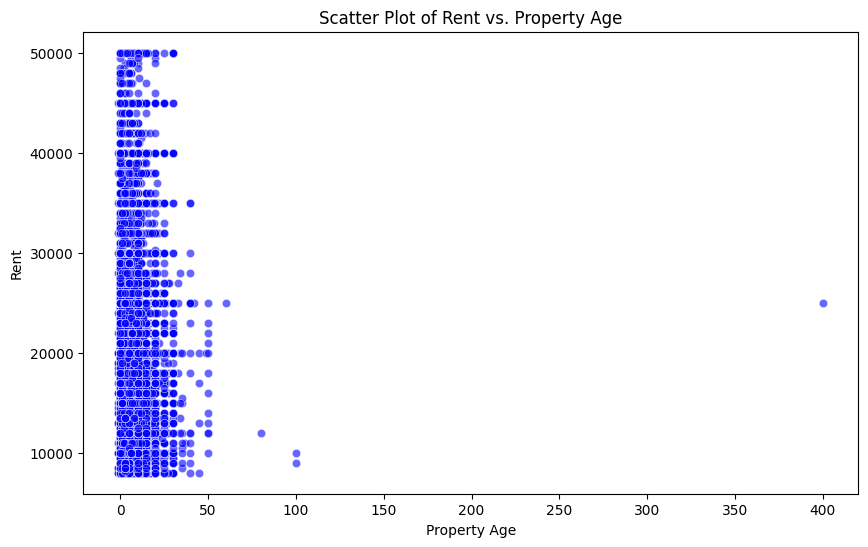

In [71]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='property_age', y='rent', data=data, alpha=0.6, color='blue')

# Set plot labels
plt.title('Scatter Plot of Rent vs. Property Age')
plt.xlabel('Property Age')
plt.ylabel('Rent')

plt.show()

C:\Users\elcot\AppData\Local\Temp\ipykernel_6968\1982202832.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], order=average_rent_by_category.index, palette='viridis')
C:\Users\elcot\AppData\Local\Temp\ipykernel_6968\1982202832.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], order=average_rent_by_category.index, palette='viridis')
C:\Users\elcot\AppData\Local\Temp\ipykernel_6968\1982202832.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column

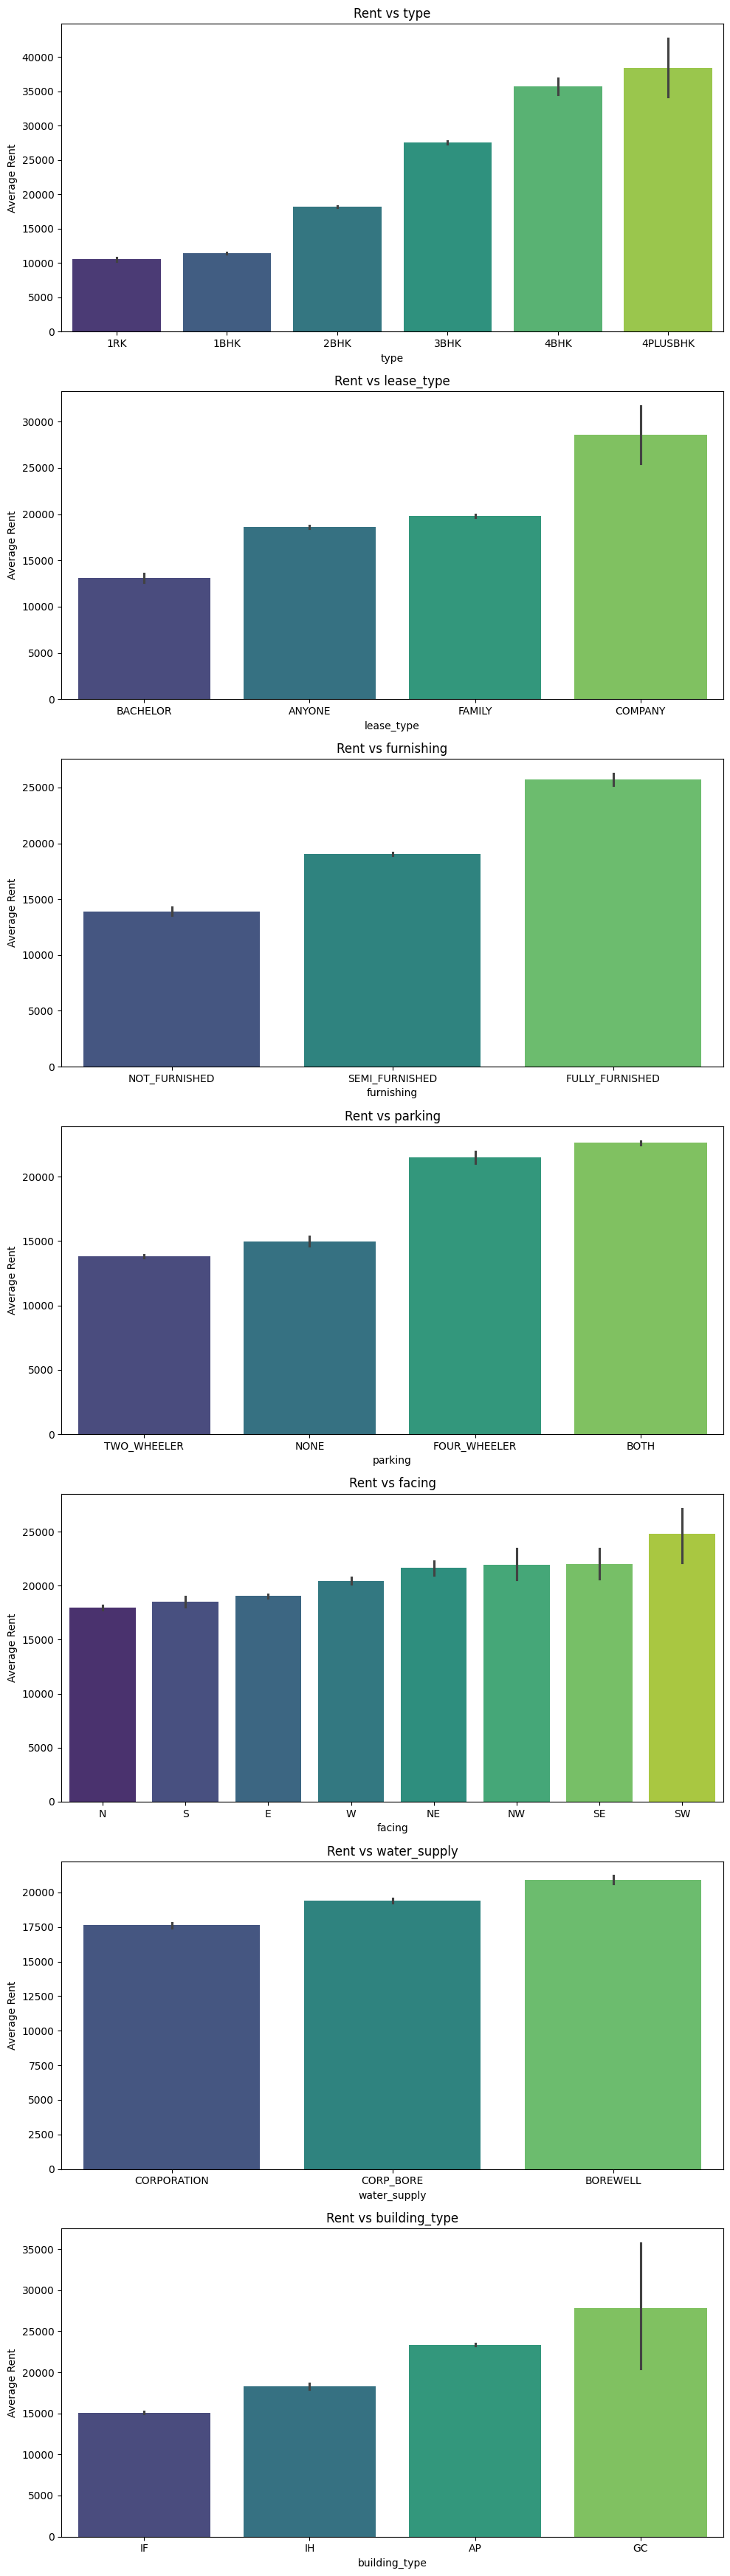

In [72]:
# List of categorical columns
categorical_columns = ['type', 'lease_type', 'furnishing', 'parking', 'facing', 'water_supply', 'building_type']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

# Loop through categorical columns and create bar plots
for i, column in enumerate(categorical_columns):
    # Calculate average rent for each category and sort by rent
    average_rent_by_category = data.groupby(column)['rent'].mean().sort_values()

    sns.barplot(x=column, y='rent', data=data, ax=axes[i], order=average_rent_by_category.index, palette='viridis')
    axes[i].set_title(f'Rent vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()

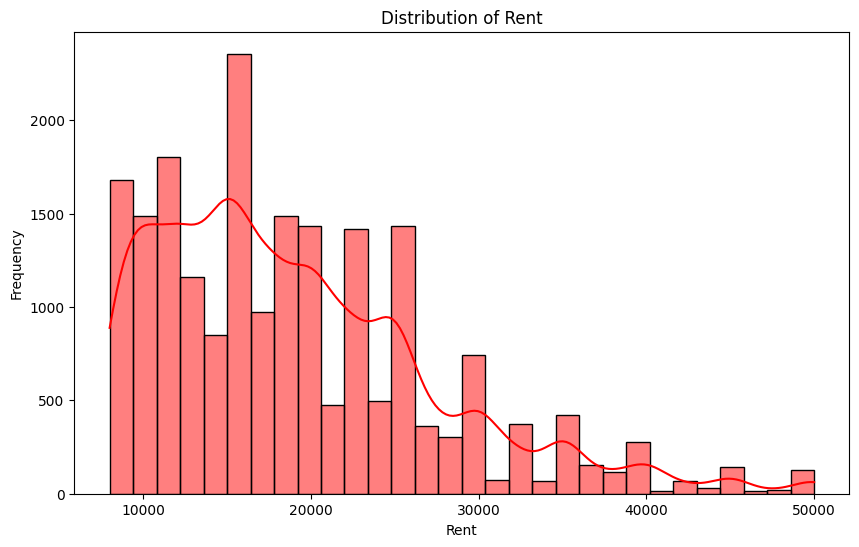

In [73]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram for 'rent'
sns.histplot(data['rent'], bins=30, kde=True, color='red', ax=ax)

# Adding labels and title
ax.set_xlabel('Rent')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Rent')

plt.show()

C:\Users\elcot\AppData\Local\Temp\ipykernel_6968\3852008318.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
C:\Users\elcot\AppData\Local\Temp\ipykernel_6968\3852008318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
C:\Users\elcot\AppData\Local\Temp\ipykernel_6968\3852008318.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
C:\Users\elcot\AppData\Local\Temp\ipykernel_6968\3852008318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

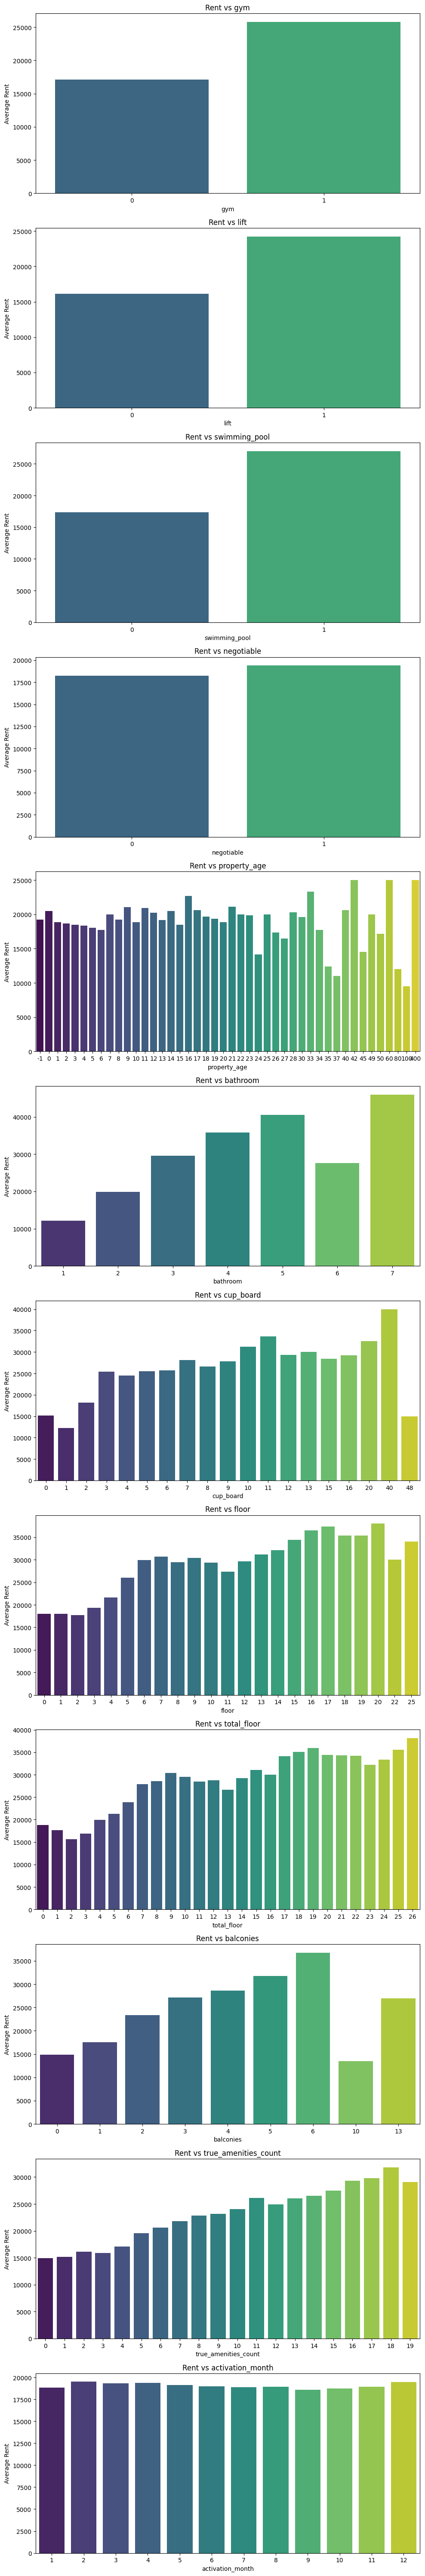

In [74]:
columns_to_plot = ['gym', 'lift', 'swimming_pool', 'negotiable', 'property_age',
                   'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'true_amenities_count', 'activation_month']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Loop through columns and create bar plots
for i, column in enumerate(columns_to_plot):
    sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
    axes[i].set_title(f'Rent vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()

C:\Users\elcot\AppData\Local\Temp\ipykernel_6968\3579214949.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='locality', y='rent', data=data_top_localities, ci=None, order=top_localities, palette='viridis')
C:\Users\elcot\AppData\Local\Temp\ipykernel_6968\3579214949.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='locality', y='rent', data=data_top_localities, ci=None, order=top_localities, palette='viridis')


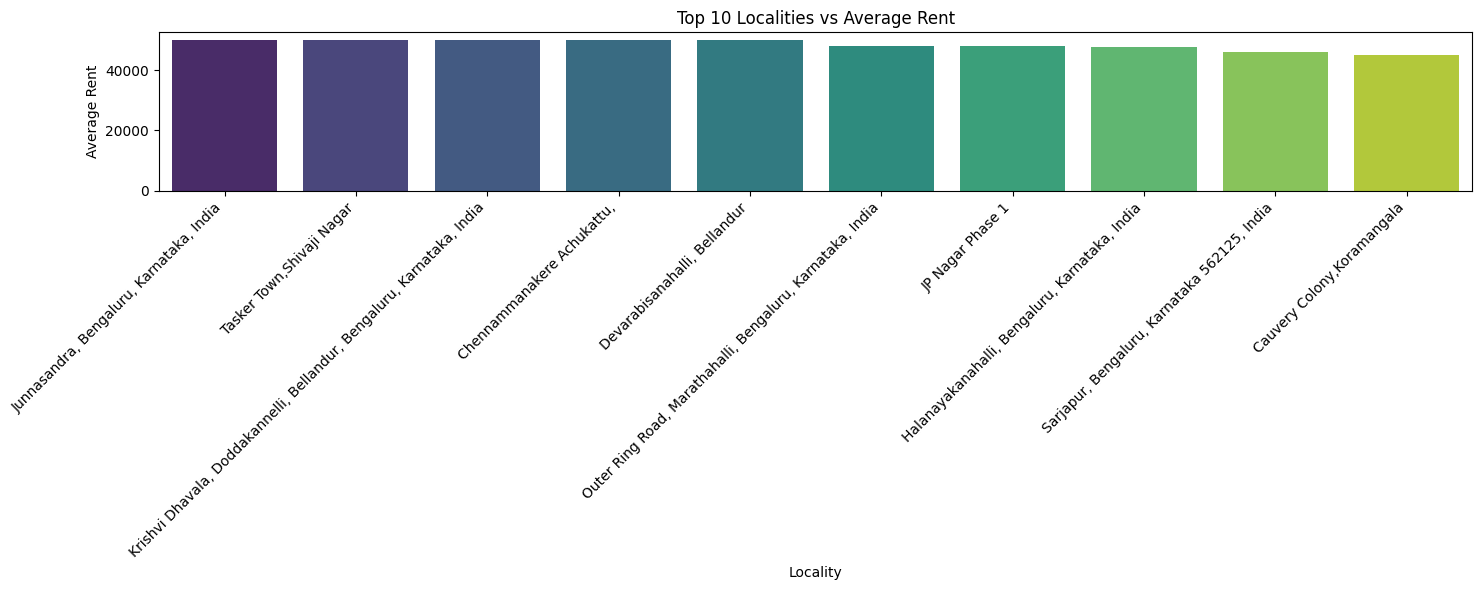

In [75]:
average_rent_by_locality = data.groupby('locality')['rent'].mean().sort_values(ascending=False)

# Select the top 10 localities
top_localities = average_rent_by_locality.head(10).index

# Filter the data for the top localities
data_top_localities = data[data['locality'].isin(top_localities)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Create the bar plot for 'locality' vs 'rent'
sns.barplot(x='locality', y='rent', data=data_top_localities, ci=None, order=top_localities, palette='viridis')

# Adding labels and title
ax.set_xlabel('Locality')
ax.set_ylabel('Average Rent')
ax.set_title('Top 10 Localities vs Average Rent')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


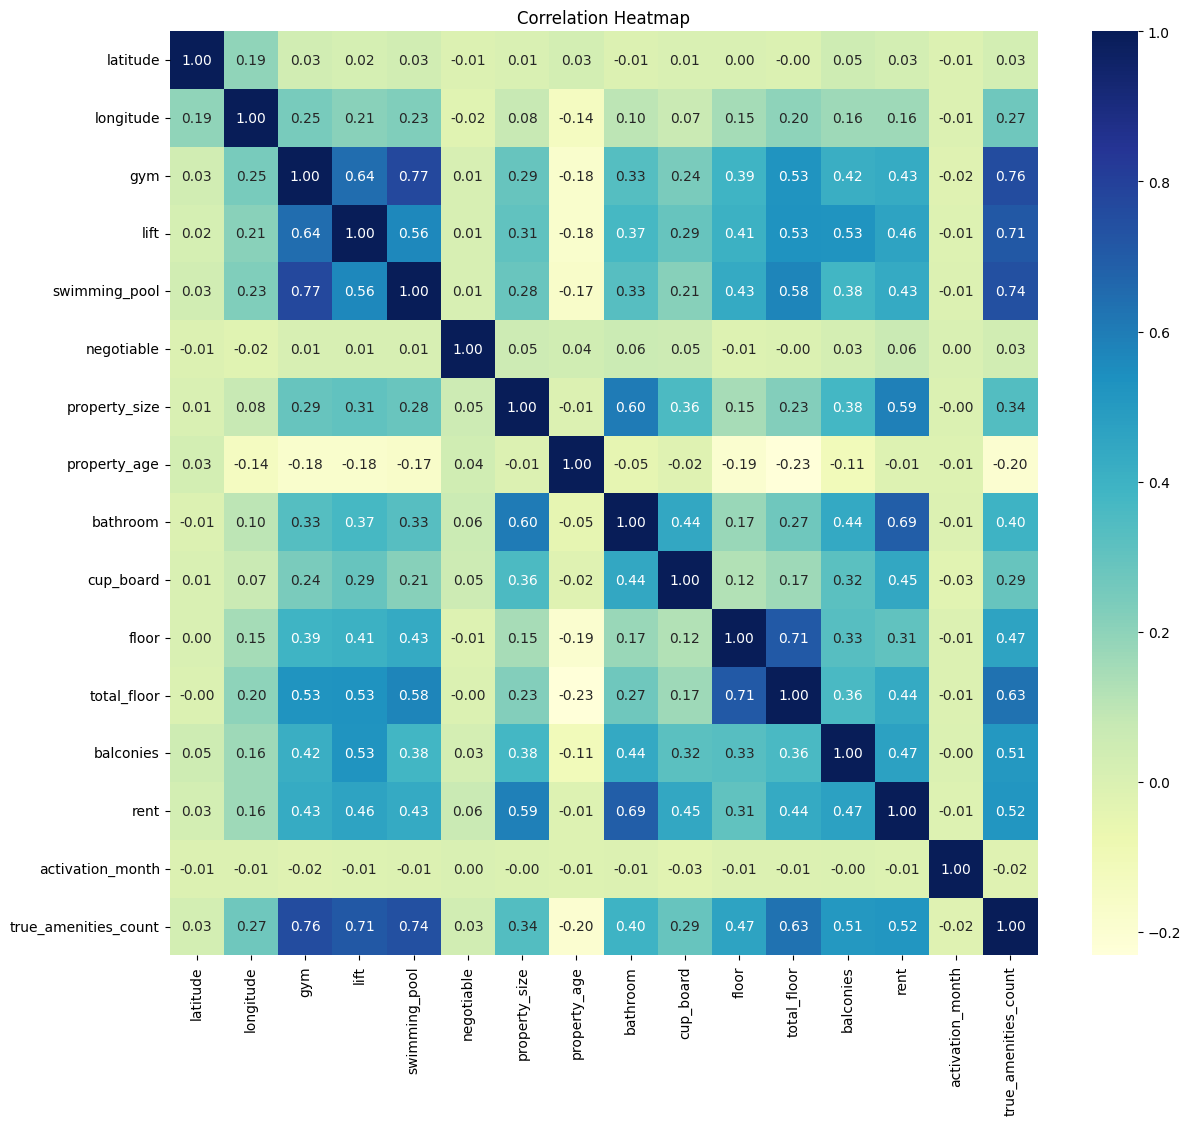

In [76]:
# Assuming 'data' is your DataFrame and you want to exclude non-numeric columns
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns

# Calculating the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

ENCODING

In [77]:
#LEBEL ENCODING (ORDER IS THERE SO I AM GOING FOR THIS , HOW I FIND HERE ORDER IS THERE I REFER THE VS PLOT THERE SHOWING A ORDER BAR PLOT)
data['type'] = data['type'].map({'1RK':0,'1BHK':1,'2BHK':2,'3BHK':3,'4BHK':4,'4PLUSBHK':5})
data['lease_type'] = data['lease_type'].map({'BACHELOR':0,'ANYONE':1,'FAMILY':2,'COMPANY':3})
data['furnishing'] = data['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1,'FULLY_FURNISHED':2})
data['parking'] = data['parking'].map({'TWO_WHEELER':0,'NONE':1,'FOUR_WHEELER':2,'BOTH':3})
data['facing'] = data['facing'].map({'N':0,'S':1,'E':2,'W':3, 'NE':4, 'NW':5, 'SE':6, 'SW':7})
data['water_supply'] = data['water_supply'].map({'CORPORATION':0,'CORP_BORE':1,'BOREWELL':2})
data['building_type'] = data['building_type'].map({'IF':0,'IH':1,'AP':2,'GC':3})

In [78]:
data["type"].value_counts()

type
2    11607
3     4368
1     3590
0      550
4      232
5       30
Name: count, dtype: int64

In [79]:
from category_encoders import LeaveOneOutEncoder

looe_encoder = LeaveOneOutEncoder(cols=['locality'])
data = looe_encoder.fit_transform(data, data['rent'])

In [80]:
data

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,activation_month,true_amenities_count
1,2,26540.972222,12.929557,77.672280,1,0,1,0,1,1,3,1400,4,2,4,2,3,4,0,2,2,22000,9,8
2,3,19048.502969,12.982870,80.262012,2,0,1,0,0,1,3,1350,6,3,2,3,1,5,1,2,3,28000,12,6
3,1,15572.916667,12.955991,77.531634,2,0,0,0,1,1,0,600,3,1,2,1,1,2,0,1,0,8000,7,0
4,3,20157.608696,12.963903,77.649446,2,0,0,0,1,1,3,1500,15,3,2,4,0,0,0,1,1,45000,5,3
5,1,28782.098765,12.986196,77.718314,2,1,1,1,1,1,3,1080,0,2,2,1,3,5,1,2,2,18000,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,1,16522.014925,12.979762,77.615395,1,0,1,0,1,1,0,850,30,2,2,1,1,4,1,2,1,20000,11,9
20528,2,20957.142857,12.931072,77.632361,1,0,0,0,1,1,3,1000,10,2,0,2,1,2,0,1,2,30000,10,4
20529,2,13625.582938,12.901800,77.566597,2,1,1,0,1,1,3,1000,0,2,3,2,5,5,2,2,2,16000,12,8
20530,2,22152.575107,12.965502,77.647694,2,0,1,0,0,1,3,1000,5,2,2,2,2,4,1,2,3,30000,6,10


SPLIT THE DATA

In [81]:
X= data.drop("rent",axis=1)
Y=data["rent"]

In [82]:
X

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,activation_month,true_amenities_count
1,2,26540.972222,12.929557,77.672280,1,0,1,0,1,1,3,1400,4,2,4,2,3,4,0,2,2,9,8
2,3,19048.502969,12.982870,80.262012,2,0,1,0,0,1,3,1350,6,3,2,3,1,5,1,2,3,12,6
3,1,15572.916667,12.955991,77.531634,2,0,0,0,1,1,0,600,3,1,2,1,1,2,0,1,0,7,0
4,3,20157.608696,12.963903,77.649446,2,0,0,0,1,1,3,1500,15,3,2,4,0,0,0,1,1,5,3
5,1,28782.098765,12.986196,77.718314,2,1,1,1,1,1,3,1080,0,2,2,1,3,5,1,2,2,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,1,16522.014925,12.979762,77.615395,1,0,1,0,1,1,0,850,30,2,2,1,1,4,1,2,1,11,9
20528,2,20957.142857,12.931072,77.632361,1,0,0,0,1,1,3,1000,10,2,0,2,1,2,0,1,2,10,4
20529,2,13625.582938,12.901800,77.566597,2,1,1,0,1,1,3,1000,0,2,3,2,5,5,2,2,2,12,8
20530,2,22152.575107,12.965502,77.647694,2,0,1,0,0,1,3,1000,5,2,2,2,2,4,1,2,3,6,10


In [83]:
Y

1        22000
2        28000
3         8000
4        45000
5        18000
         ...  
20524    20000
20528    30000
20529    16000
20530    30000
20531     8500
Name: rent, Length: 20377, dtype: int32

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=70)

In [85]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(16301, 23) (4076, 23) (16301,) (4076,)


In [86]:
X_train

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,activation_month,true_amenities_count
353,3,23111.111111,12.939002,77.523364,2,1,1,1,0,1,3,1811,4,3,2,4,8,12,1,2,2,7,19
13728,1,13388.888889,12.967443,77.670188,1,0,0,0,1,1,1,400,10,1,2,1,0,3,0,1,1,6,3
3112,2,19048.502969,12.963826,77.723200,1,0,0,0,0,1,3,1200,5,2,0,2,3,4,2,2,2,4,1
12149,2,15275.038880,12.922217,77.567030,2,0,0,0,1,1,3,1600,15,2,0,2,1,2,0,0,1,12,4
7339,1,16209.844560,12.992284,77.537150,2,0,0,0,1,1,3,650,1,1,4,1,3,4,0,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,1,17166.666667,12.900186,77.597174,1,1,1,0,1,1,3,600,5,1,2,1,0,4,1,2,1,12,6
5497,0,16867.136150,12.911589,77.606321,2,0,0,0,1,2,2,800,25,2,1,2,0,3,0,2,0,3,0
12835,2,20363.069016,12.919149,77.637569,1,0,0,0,1,1,3,900,6,2,0,2,1,2,1,0,1,4,3
15343,2,13500.000000,12.915680,77.572516,1,0,0,0,1,1,3,1000,2,2,2,1,1,1,0,0,1,7,4


In [87]:
X_test

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,activation_month,true_amenities_count
11586,1,19136.363636,12.911815,77.587657,2,0,0,0,1,1,0,600,8,2,0,2,2,2,0,0,1,2,1
13142,3,15278.149300,12.937706,77.546932,2,0,0,0,0,1,3,1680,10,2,0,3,0,2,1,0,0,7,1
8172,3,28256.410256,12.935430,77.697375,2,1,1,0,1,1,2,2339,4,4,2,3,1,5,1,2,3,7,13
16789,2,20854.282536,12.976525,77.741052,2,1,1,1,1,1,3,1200,2,2,2,2,0,4,2,2,0,7,14
18000,2,15146.017699,12.960678,77.512362,2,0,0,0,1,1,0,1200,3,2,1,2,0,2,1,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,2,15296.034215,12.938307,77.556324,1,0,0,0,1,0,0,400,10,1,1,0,0,3,1,0,0,6,3
5328,1,20358.663730,12.912091,77.637403,1,0,0,0,1,1,0,450,1,1,0,1,2,4,1,1,1,7,3
1719,3,13717.021277,12.928048,77.541606,2,0,0,0,1,1,0,1200,10,3,2,3,0,0,1,0,0,5,2
7634,3,21017.948718,12.905884,77.695972,2,1,1,1,1,1,3,1390,1,3,3,2,1,3,0,2,3,2,10


In [88]:
print(len(Y_train))
print(len(Y_test))    

16301
4076


SCALE THE DATA

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 1.32107215,  0.933426  , -0.22687254, ...,  0.86093746,
          0.21002907,  2.98915257],
        [-1.34363083, -1.31262873,  0.73702266, ..., -0.14581588,
         -0.09788386, -0.48528586],
        [-0.01127934, -0.005129  ,  0.61443395, ...,  0.86093746,
         -0.71370971, -0.91959067],
        ...,
        [-0.01127934,  0.2985657 , -0.89968219, ..., -0.14581588,
         -0.71370971, -0.48528586],
        [-0.01127934, -1.28695953, -1.01722638, ..., -0.14581588,
          0.21002907, -0.26813346],
        [ 1.32107215, -0.09630532,  0.92203309, ...,  1.8676908 ,
          0.21002907,  1.03478095]]),
 array([[-1.34363083,  0.01516882, -1.14821034, ..., -0.14581588,
         -1.32953556, -0.91959067],
        [ 1.32107215, -0.87616655, -0.27079707, ..., -1.15256922,
          0.21002907, -0.91959067],
        [ 1.32107215,  2.12210727, -0.34791079, ...,  1.8676908 ,
          0.21002907,  1.68623816],
        ...,
        [ 1.32107215, -1.23682267, -0.59807921, ..., -

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [91]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,Y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(Y_test)

[14131.51302788 22110.39874324 36999.92321522 ... 20035.10658762
 26872.21847057 16373.44598108]
11586    13000
13142    20000
8172     35000
16789    25000
18000    18000
         ...  
1129      8500
5328     15000
1719     16000
7634     24000
2787     16000
Name: rent, Length: 4076, dtype: int32


In [92]:
linear_model.score(X_test, Y_test)

0.5121515594932965

In [93]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_model=cross_val_score(linear_model,X_train,Y_train,cv=10).mean()
cross_val_linear_model

0.697362110389481

K Nearest Neighbor Regression

In [94]:
knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,Y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,Y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,Y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,Y_train,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  0.47363113485232056
K value :  2  train score :  0.871034156684732 cross_val_score :  0.5932277888498538
K value :  3  train score :  0.820780314342977 cross_val_score :  0.6370544248417975
K value :  4  train score :  0.7971004333757061 cross_val_score :  0.6562255576819302
K value :  5  train score :  0.7816252650364379 cross_val_score :  0.6702568778044888
K value :  6  train score :  0.7718200284556306 cross_val_score :  0.6773572336643691
K value :  7  train score :  0.7638978422769207 cross_val_score :  0.68088301508392
K value :  8  train score :  0.7576973949842697 cross_val_score :  0.6848086139995101
K value :  9  train score :  0.7531141851897073 cross_val_score :  0.6866015820841292
K value :  10  train score :  0.7491223787975099 cross_val_score :  0.6877664119127335
K value :  11  train score :  0.7441615464360041 cross_val_score :  0.6891699555611704
K value :  12  train score :  0.7410246596878096 cross_val_score :  0.

In [95]:
cross_val_knn_regressor=max(cross_val_knn)

In [96]:
print("The best K-Value is 15 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 15 and Cross_val_score is 0.6909030484321257


 Implementing K Nearest Neighbor Regression

In [98]:
knn_regressor=KNeighborsRegressor(n_neighbors=15)
knn_regressor.fit(X_train_scaled,Y_train)

KNeighborsRegressor(n_neighbors=15)

In [99]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,Y_train,cv=15).mean()
cross_val_knn_regressor

0.6918109157237531

Decision Tree Regression

In [101]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,Y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,Y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,Y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,Y_train,cv = 10).mean())

Depth :  1  train Score  :  0.3897380622642833 cross_val_score :  0.3831769370801189
Depth :  2  train Score  :  0.5517920848358266 cross_val_score :  0.5527923148961741
Depth :  3  train Score  :  0.6131184930116012 cross_val_score :  0.612289513863187
Depth :  4  train Score  :  0.6593434291230609 cross_val_score :  0.6524640419382799
Depth :  5  train Score  :  0.6912579321248009 cross_val_score :  0.6796979780858063
Depth :  6  train Score  :  0.7193518796025021 cross_val_score :  0.6973941400496082
Depth :  7  train Score  :  0.7471650087932764 cross_val_score :  0.7124773214162385
Depth :  8  train Score  :  0.7772235439940691 cross_val_score :  0.7168046850709151
Depth :  9  train Score  :  0.809359145788217 cross_val_score :  0.7218230966554458
Depth :  10  train Score  :  0.840348936756627 cross_val_score :  0.7161989755378433
Depth :  11  train Score  :  0.867232968024097 cross_val_score :  0.7114901383603853
Depth :  12  train Score  :  0.8929912862498138 cross_val_score :  

In [102]:
cross_val_dt_regressor=max(cross_val_dt)

In [103]:
print("The best depth is 9 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 9 and Cross_val_score is: 0.7218230966554458


 Implementing Decision Tree Regression

In [105]:
dt_regressor=DecisionTreeRegressor(max_depth=9, random_state=0)
dt_regressor.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=9, random_state=0)

In [106]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,Y_train,cv=10).mean()
cross_val_dt_regressor

0.7218230966554458

In [108]:
ftImp = list(zip(dt_regressor.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
11,0.731249,property_size
3,0.109440,longitude
1,0.036554,locality
13,0.034017,bathroom
17,0.019799,total_floor
2,0.016429,latitude
0,0.015623,type
9,0.009318,furnishing
6,0.004518,lift
15,0.004298,cup_board


 Random Forest Regression

In [109]:
max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,Y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,Y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,Y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.5802294416287962
Depth :  4 cross_val_score :  0.6872345561130881
Depth :  8 cross_val_score :  0.7735651822822833
Depth :  10 cross_val_score :  0.7951322045686783
Depth :  11 cross_val_score :  0.8018393641829834
Depth :  12 cross_val_score :  0.8069055917932837
Depth :  13 cross_val_score :  0.8107805695061278
Depth :  15 cross_val_score :  0.8158201853316468
Depth :  18 cross_val_score :  0.8188217579457863
Depth :  20 cross_val_score :  0.8196355309221454


In [111]:
cross_val_rf_regressor=max(cross_val_rf)

In [112]:
print("The best depth is 20 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 20 and Cross_val_score is: 0.8196355309221454


Implementing Random Forest Regression

In [113]:
rf_regressor=RandomForestRegressor(max_depth=20, random_state=0)
rf_regressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [114]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,Y_train,cv=15).mean()
cross_val_rf_regressor

0.8196355309221454

 Extreme Gradient Boosting Regression

In [115]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,Y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,Y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,Y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.6420512926200689
Learning rate :  0.05 cross_val_score: 0.8135291865471588
Learning rate :  0.08 cross_val_score: 0.8228948904635767
Learning rate :  0.1 cross_val_score: 0.8248949019630973
Learning rate :  0.2 cross_val_score: 0.8320405335017675
Learning rate :  0.25 cross_val_score: 0.831771972914805
Learning rate :  0.3 cross_val_score: 0.8296232670573855


In [116]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [117]:
print("The best Learning rate is 0.2 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.2 and Cross_val_score is: 0.8320405335017675


Implementing Extreme Gradient Boosting Regression


In [119]:
  xgb_regressor= xgb.XGBRegressor(learning_rate =0.1,n_estimators=100) # initialise the model
  xgb_regressor.fit(X_train,Y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [121]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,Y_train,cv=15).mean()
cross_val_xgb_regressor

0.8248949019630973

 Cross-Validation Score for Machine-Learning Models

In [125]:
from sklearn.metrics import r2_score

In [126]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.697362110389481
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.6918109157237531
Cross Validation Score for Decision Tree Regression Model:  0.7218230966554458
Cross Validation Score for Random Forest Regression Model:  0.8196355309221454
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.8248949019630973


R2 Score for Machine-Learning Models

In [127]:
Y_pred_lr=linear_model.predict(X_test)
Y_pred_knn=knn_regressor.predict(X_test)
Y_pred_dt= dt_regressor.predict(X_test)
Y_pred_rf=rf_regressor.predict(X_test)
Y_pred_xgb=xgb_regressor.predict(X_test)

C:\Users\elcot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [128]:
R2_score_lr=r2_score(Y_test,Y_pred_lr)
R2_score_knn=r2_score(Y_test,Y_pred_knn)
R2_score_dt=r2_score(Y_test,Y_pred_dt)
R2_score_rf=r2_score(Y_test,Y_pred_rf)
R2_score_xgb=r2_score(Y_test,Y_pred_xgb)

In [129]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.5121515594932965
R2 Score for K-Nearest Neighbors Regression Model: -4.302290062731949
R2 Score for Decision Tree Regression Model:  0.717795965793147
R2 Score for Random Forest Regression Model:  0.8202645147809171
R2 Score for Extreme-Gradient Boosting Regression Model:  0.8250549992068358


Solving problem statements based on Feature Importance

In [130]:
rf_regressor.feature_importances_

array([0.02253466, 0.06714153, 0.03652928, 0.10898349, 0.00561404,
       0.00119642, 0.00502745, 0.00201828, 0.00237156, 0.01152713,
       0.00794512, 0.60336053, 0.01381896, 0.02359334, 0.00662516,
       0.00943026, 0.00801622, 0.02442436, 0.00352891, 0.00479854,
       0.0056573 , 0.01020598, 0.01565147])

In [131]:
data.columns

Index(['type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'water_supply', 'building_type', 'balconies',
       'rent', 'activation_month', 'true_amenities_count'],
      dtype='object')

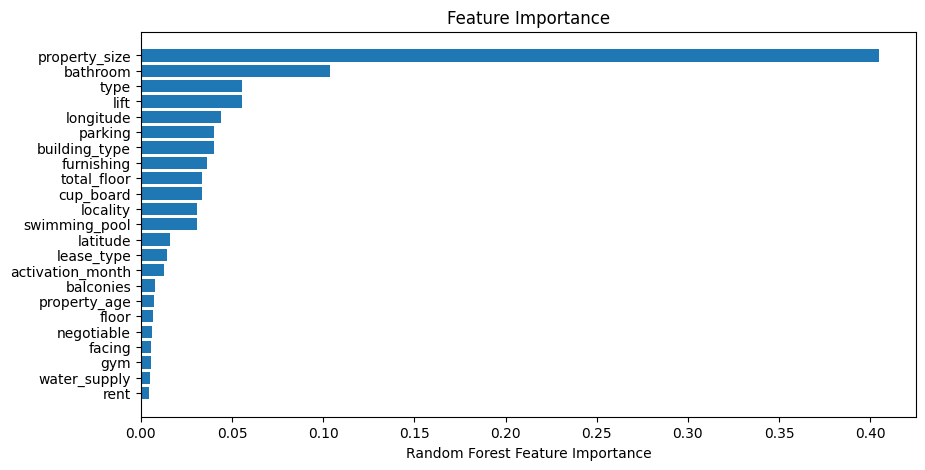

In [133]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [134]:
xgb_regressor.feature_importances_

array([0.05573449, 0.03079503, 0.01589615, 0.04414026, 0.01451641,
       0.00547082, 0.05541834, 0.03076524, 0.00613994, 0.03640057,
       0.04020581, 0.40475598, 0.00731472, 0.10372543, 0.00573896,
       0.03330103, 0.00652492, 0.03358649, 0.00490924, 0.03996531,
       0.00756045, 0.00420893, 0.01292547], dtype=float32)

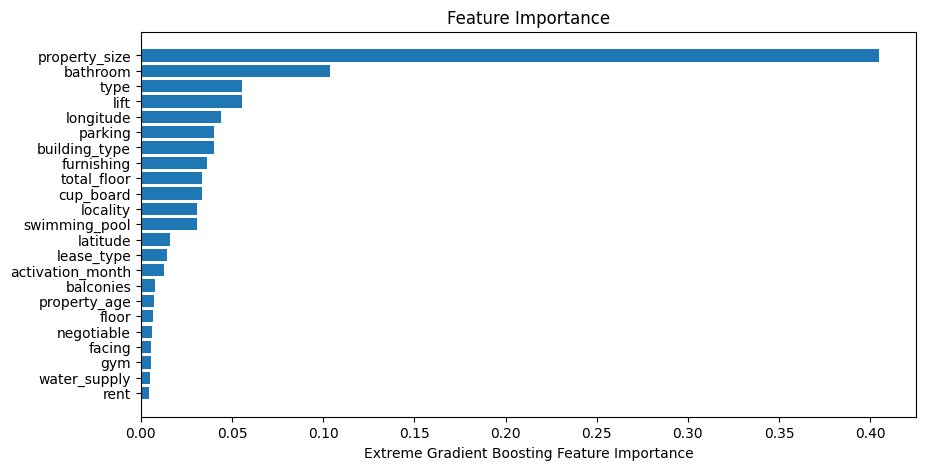

In [136]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

Evaluate Your System on the Test Set

In [263]:
df=pd.read_excel("House_Rent_Test.xlsx")
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1300,1,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,7,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,10,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,0,NOT_FURNISHED,TWO_WHEELER,500,8,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1400,0,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,950,2,2,N,2,3,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,750,10,1,N,2,2,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,1,SEMI_FURNISHED,NONE,500,10,1,W,1,2,3,"{""SC"":false,""INTERCOM"":false,""AC"":false,""PB"":f...",CORP_BORE,IH,0
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1450,1,3,N,4,10,10,"{""SC"":false,""INTERCOM"":true,""AC"":false,""PB"":tr...",BOREWELL,AP,3


In [264]:
df.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1300,1,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,7,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,10,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,0,NOT_FURNISHED,TWO_WHEELER,500,8,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1400,0,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1


In [265]:
df.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,950,2,2,N,2,3,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,750,10,1,N,2,2,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,1,SEMI_FURNISHED,NONE,500,10,1,W,1,2,3,"{""SC"":false,""INTERCOM"":false,""AC"":false,""PB"":f...",CORP_BORE,IH,0
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1450,1,3,N,4,10,10,"{""SC"":false,""INTERCOM"":true,""AC"":false,""PB"":tr...",BOREWELL,AP,3
4499,ff808181615af5c101616150bd28356e,BHK3,Kaikondrahalli,27-03-2018 16:25,12.915296,77.676694,FAMILY,1,1,1,0,SEMI_FURNISHED,FOUR_WHEELER,1500,10,3,E,7,5,8,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",BOREWELL,AP,3


In [266]:
print("columns--->",df.shape[1])
print("row--->",df.shape[0])

columns---> 24
row---> 4500


In [267]:
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies'],
      dtype='object')

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4500 non-null   object 
 1   type             4500 non-null   object 
 2   locality         4500 non-null   object 
 3   activation_date  4500 non-null   object 
 4   latitude         4500 non-null   float64
 5   longitude        4500 non-null   float64
 6   lease_type       4500 non-null   object 
 7   gym              4500 non-null   int64  
 8   lift             4500 non-null   int64  
 9   swimming_pool    4500 non-null   int64  
 10  negotiable       4500 non-null   int64  
 11  furnishing       4500 non-null   object 
 12  parking          4500 non-null   object 
 13  property_size    4500 non-null   int64  
 14  property_age     4500 non-null   int64  
 15  bathroom         4500 non-null   int64  
 16  facing           4500 non-null   object 
 17  cup_board     

In [269]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
dtype: int64

In [270]:
df["type"].value_counts()

type
BHK2        2524
BHK3         990
BHK1         808
RK1          105
BHK4          66
BHK4PLUS       7
Name: count, dtype: int64

In [271]:
df['activation_date'] = pd.to_datetime(df['activation_date'])

C:\Users\elcot\AppData\Local\Temp\ipykernel_6968\1377586033.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['activation_date'] = pd.to_datetime(df['activation_date'])


In [273]:
# Extracting month and day
df['activation_month'] = df['activation_date'].dt.month
df['activation_day'] = df['activation_date'].dt.day

# Display the updated DataFrame
print(df[['activation_date', 'activation_month', 'activation_day']])


         activation_date  activation_month  activation_day
0    2017-08-22 09:00:00                 8              22
1    2017-09-17 16:33:00                 9              17
2    2018-04-14 17:27:00                 4              14
3    2017-11-12 13:15:00                11              12
4    2017-11-07 16:44:00                11               7
...                  ...               ...             ...
4495 2018-10-06 18:22:00                10               6
4496 2018-01-21 14:36:00                 1              21
4497 2018-05-30 16:10:00                 5              30
4498 2018-11-07 16:17:00                11               7
4499 2018-03-27 16:25:00                 3              27

[4500 rows x 3 columns]


In [274]:
df['bathroom'] = df['bathroom'].astype(int)
df['cup_board'] = df['cup_board'].astype(int)
df['floor'] = df['floor'].astype(int)
df['total_floor'] = df['total_floor'].astype(int)
df['balconies'] = df['balconies'].astype(int)
df['property_age'] = df['property_age'].astype(int)

In [275]:
import json

# Assuming 'amenities' column contains JSON strings, convert them to dictionaries
df['amenities'] = df['amenities'].apply(lambda x: json.loads(x))

# Now, you can apply your function to count 'True' values in dictionaries
df['true_amenities_count'] = df['amenities'].apply(lambda x: list(x.values()).count(True))

In [276]:
df.drop(columns = 'amenities', inplace = True)

In [277]:
df.drop(columns=["id",'activation_date','activation_day'],inplace=True)

In [278]:
#LEBEL ENCODING (ORDER IS THERE SO I AM GOING FOR THIS , HOW I FIND HERE ORDER IS THERE I REFER THE VS PLOT THERE SHOWING A ORDER BAR PLOT)
df['type'] = df['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5})
df['lease_type'] = df['lease_type'].map({'BACHELOR':0,'ANYONE':1,'FAMILY':2,'COMPANY':3})
df['furnishing'] = df['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1,'FULLY_FURNISHED':2})
df['parking'] = df['parking'].map({'TWO_WHEELER':0,'NONE':1,'FOUR_WHEELER':2,'BOTH':3})
df['facing'] = df['facing'].map({'N':0,'S':1,'E':2,'W':3, 'NE':4, 'NW':5, 'SE':6, 'SW':7})
df['water_supply'] = df['water_supply'].map({'CORPORATION':0,'CORP_BORE':1,'BOREWELL':2})
df['building_type'] = df['building_type'].map({'IF':0,'IH':1,'AP':2,'GC':3})

In [279]:

# Perform leave-one-out encoding for card_type, card_number, and tid
from category_encoders import LeaveOneOutEncoder

looe_encoder = LeaveOneOutEncoder(cols=['locality'])
df = looe_encoder.fit_transform(df, df['property_size'])
     

In [280]:
df

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,activation_month,true_amenities_count
0,2,973.173077,12.941603,77.568156,2,0,1,0,0,1,3,1300,1,2,0,2,3,3,1,2,1,8,4
1,2,792.159091,12.998803,77.561887,1,0,0,0,1,1,0,600,7,1,1,2,0,3,0,0,0,9,4
2,1,691.777778,12.966467,77.661063,1,0,0,0,1,1,0,600,10,1,1,1,0,1,0,0,0,4,5
3,1,1072.577778,12.941533,77.592606,1,0,0,0,0,0,0,500,8,1,2,0,2,2,1,0,0,11,2
4,3,1522.514286,12.971083,77.751625,1,1,1,1,1,1,3,1400,0,3,2,3,3,4,2,2,1,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,2,700.000000,12.941654,77.559999,2,0,0,0,1,1,3,950,2,2,0,2,3,3,1,0,2,10,3
4496,2,695.000000,12.942973,77.597738,1,0,0,0,1,1,0,750,10,1,0,2,2,3,0,0,1,1,1
4497,1,1072.577778,12.949315,77.713807,1,0,0,0,1,1,1,500,10,1,3,1,2,3,1,1,0,5,1
4498,3,1475.000000,12.914104,77.716428,2,1,1,1,1,1,3,1450,1,3,0,4,10,10,2,2,3,11,9


In [281]:

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=Y_train, enable_categorical=True)
test = xgb.DMatrix(data=df, enable_categorical=True)

In [282]:

import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(test)

In [283]:

def custom_round(x):
    round_value=round(x*100)
    return round_value/100

In [285]:
y_pred1=np.vectorize(custom_round)(y_pred)
y_pred1

array([23014.79, 10477.09, 10120.17, ..., 10878.86, 22389.52, 31936.7 ])

In [286]:
submission =pd.read_excel("House_Rent_Test.xlsx")
Predicted_rent=pd.DataFrame({'id':submission['id'],'rent':y_pred1})

In [287]:
Predicted_rent.to_csv('Submission.csv', index = False)

In [288]:
Submission = pd.read_csv('Submission.csv')
Submission

,id,rent
0,ff8081815df539bc015df947ce976cca,23014.79
1,ff80818157288e9301572c05651853a6,10477.09
2,ff8081815f1afc58015f1b831fde166e,10120.17
3,ff8081816035b31901603f7922c046e0,9191.24
4,ff8081815c3582f5015c38fc31aa73a4,22656.70
...,...,...
4495,ff8081815216f51101521aa9d46c191f,16875.41
4496,ff8081816098166901609bf52bb702a8,14650.97
4497,ff808181629ac9860162a7ac1a4253bb,10878.86
4498,ff8081815b57c717015b580af22f1bbd,22389.52
